![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout
from sklearn.preprocessing import StandardScaler
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [3]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


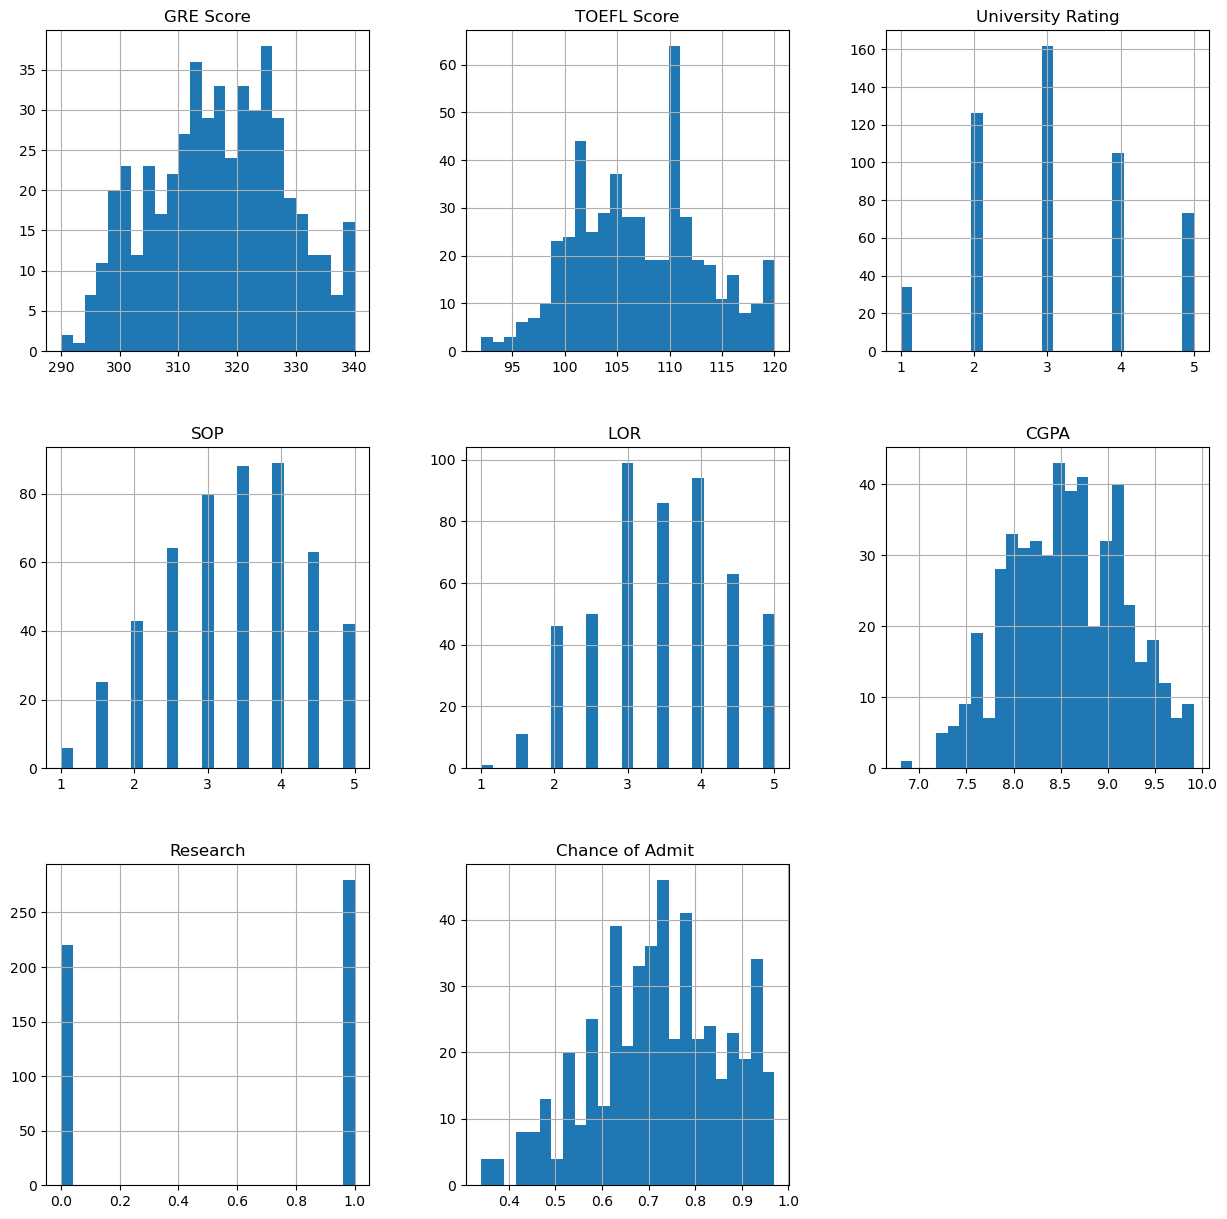

In [4]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [5]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
#No funciona con esta definición de Y
# Y = data[data.columns[-1]] 
Y = pd.DataFrame(data[data.columns[-1]])

In [6]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [7]:
# Normalización de variables predictoras
scaler = StandardScaler()

# Transformación de los set de entrenamiento y test
xTrain = pd.DataFrame(data=scaler.fit_transform(xTrain), columns=xTrain.columns, index=xTrain.index)
xTest = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

xTrain = np.array(xTrain)
yTrain = np.array(yTrain)

xTest = np.array(xTest)
yTest = np.array(yTest)

In [8]:
# Definición de dimensiones de salida, variables de interés
output_var = yTrain.shape[1]
print(output_var, ' output variables')

1  output variables


In [9]:
# Definición de dimensiones de entrada, variables predictoras
dims = xTrain.shape[1]
print(dims, 'input variables')

7 input variables


## Error cuadrático medio

In [10]:
# Celda 1
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
# Definición de función de perdida
model.compile(optimizer='sgd', loss='mean_squared_error')

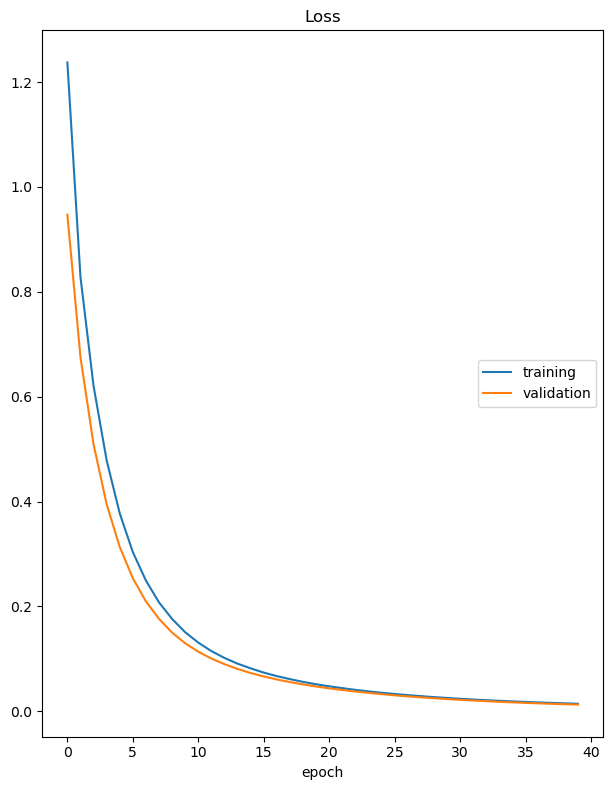

Loss
	training         	 (min:    0.014, max:    1.237, cur:    0.014)
	validation       	 (min:    0.013, max:    0.947, cur:    0.013)
11/11 [==============================] - 0s 20ms/step - loss: 0.0144 - val_loss: 0.0127


In [12]:
# Entrenamiento de la red neuronal con 50 épocas
model.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=40, 
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])

## Error absoluto medio

In [13]:
# Celda 1
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

In [14]:
# Definición de función de perdida
model.compile(optimizer='sgd', loss='mean_absolute_error')

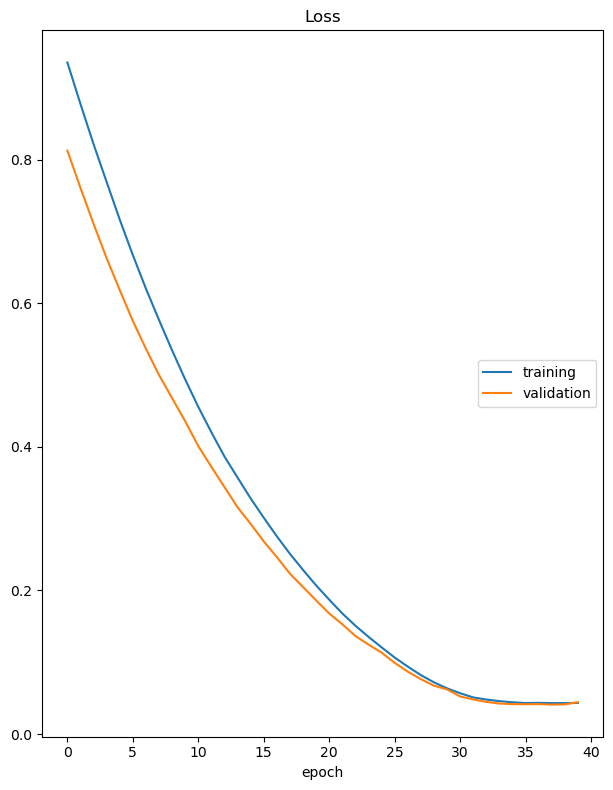

Loss
	training         	 (min:    0.043, max:    0.935, cur:    0.043)
	validation       	 (min:    0.041, max:    0.812, cur:    0.044)
11/11 [==============================] - 0s 20ms/step - loss: 0.0434 - val_loss: 0.0444


In [15]:
# Entrenamiento de la red neuronal con 50 épocas
model.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=40, 
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

## Error cuadrático medio

In [16]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Capa entrada
model.add(Dense(256, input_shape=(dims,),activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
model.compile(optimizer='sgd', loss='mean_squared_error')

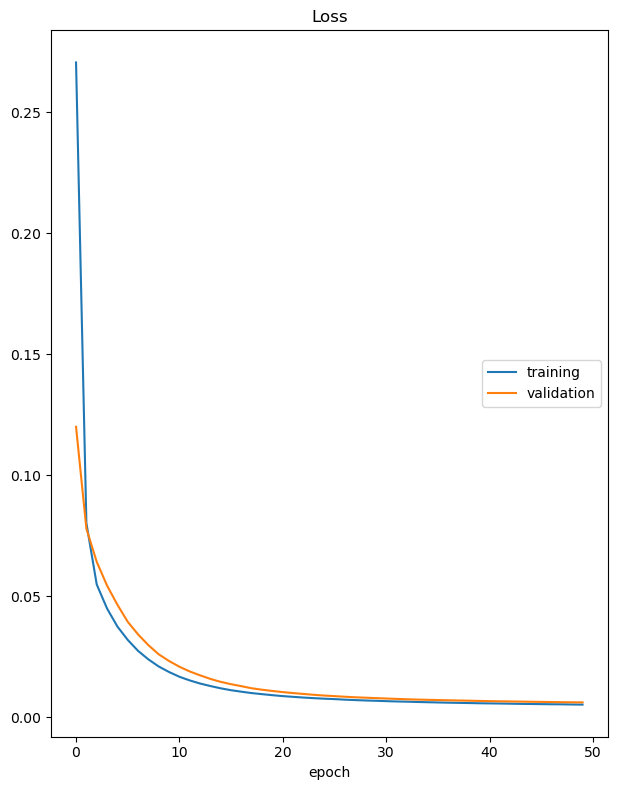

Loss
	training         	 (min:    0.005, max:    0.271, cur:    0.005)
	validation       	 (min:    0.006, max:    0.120, cur:    0.006)
11/11 [==============================] - 0s 17ms/step - loss: 0.0052 - val_loss: 0.0061


In [18]:
model.fit(xTrain, yTrain,
          validation_data=(xTest, yTest),
          epochs=50, 
          callbacks=[PlotLossesKeras()])

# Error absoluto medio

In [19]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Capa entrada
model.add(Dense(256, input_shape=(dims,),activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
model.compile(optimizer='sgd', loss='mean_absolute_error')

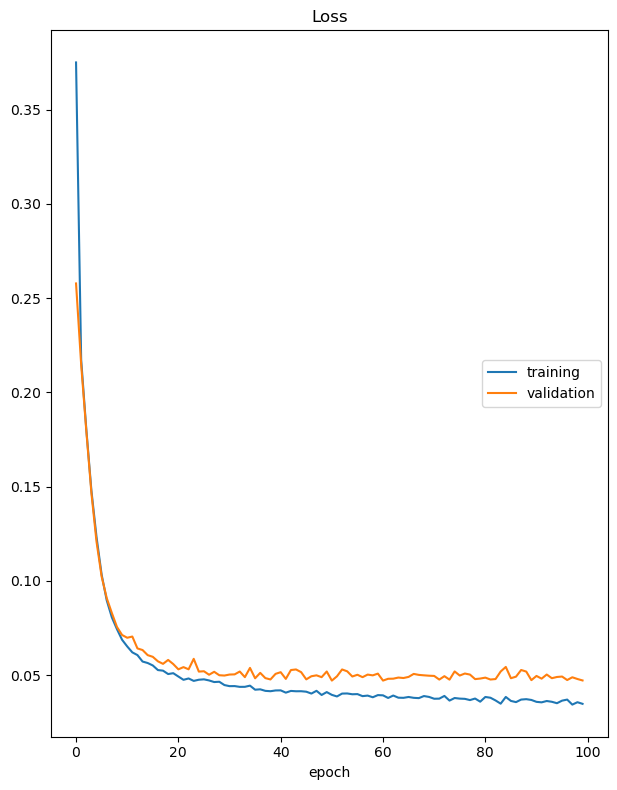

Loss
	training         	 (min:    0.034, max:    0.375, cur:    0.035)
	validation       	 (min:    0.047, max:    0.258, cur:    0.047)
11/11 [==============================] - 0s 19ms/step - loss: 0.0347 - val_loss: 0.0471


In [21]:
model.fit(xTrain, yTrain,
          validation_data=(xTest, yTest),
          epochs=100, 
          callbacks=[PlotLossesKeras()])

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

## Error cuadrático medio

In [22]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(256, input_shape=(dims,),activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))
#porcentaje de neuronas que se desactivaran en la red neuronal en las capas ocultas
model.add(Dropout(0.5))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
 dropout (Dropout)           (None, 1)                 0         
                                                                 
Total params: 68,097
Trainable params: 68,097
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
model.compile(optimizer='sgd', loss='mean_squared_error')

In [24]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 

In [25]:
fBestModel = 'MSE_model.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

In [26]:
model.fit(xTrain, yTrain, 
          verbose=True, 
          epochs=50, 
          batch_size=128,
          validation_data=(xTest,yTest),
          callbacks=[best_model, early_stop])

Epoch 1/50
3/3 [==============================] - 1s 73ms/step - loss: 0.4030 - val_loss: 0.2682
Epoch 2/50
3/3 [==============================] - 0s 21ms/step - loss: 0.2865 - val_loss: 0.1996
Epoch 3/50
3/3 [==============================] - 0s 21ms/step - loss: 0.3259 - val_loss: 0.1814
Epoch 4/50
3/3 [==============================] - 0s 23ms/step - loss: 0.3069 - val_loss: 0.1714
Epoch 5/50
3/3 [==============================] - 0s 21ms/step - loss: 0.2788 - val_loss: 0.1671
Epoch 6/50
3/3 [==============================] - 0s 21ms/step - loss: 0.2921 - val_loss: 0.1617
Epoch 7/50
3/3 [==============================] - 0s 25ms/step - loss: 0.2854 - val_loss: 0.1616
Epoch 8/50
3/3 [==============================] - 0s 29ms/step - loss: 0.3041 - val_loss: 0.1605
Epoch 9/50
3/3 [==============================] - 0s 23ms/step - loss: 0.2643 - val_loss: 0.1589
Epoch 10/50
3/3 [==============================] - 0s 22ms/step - loss: 0.3037 - val_loss: 0.1566
Epoch 11/50
3/3 [============

## Error absoluto medio

In [27]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(256, input_shape=(dims,),activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))
#porcentaje de neuronas que se desactivaran en la red neuronal en las capas ocultas
model.add(Dropout(0.5))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
 dropout (Dropout)           (None, 1)                 0         
                                                                 
Total params: 68,097
Trainable params: 68,097
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
model.compile(optimizer='sgd', loss='mean_absolute_error')

In [29]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 

In [30]:
fBestModel = 'MAE_model.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

In [31]:
model.fit(xTrain, yTrain, 
          verbose=True, 
          epochs=50, 
          batch_size=128,
          validation_data=(xTest,yTest),
          callbacks=[best_model, early_stop])

Epoch 1/50
3/3 [==============================] - 0s 71ms/step - loss: 0.5991 - val_loss: 0.5539
Epoch 2/50
3/3 [==============================] - 0s 23ms/step - loss: 0.5735 - val_loss: 0.4933
Epoch 3/50
3/3 [==============================] - 0s 24ms/step - loss: 0.5298 - val_loss: 0.4314
Epoch 4/50
3/3 [==============================] - 0s 29ms/step - loss: 0.4525 - val_loss: 0.3744
Epoch 5/50
3/3 [==============================] - 0s 19ms/step - loss: 0.4341 - val_loss: 0.3784
Epoch 6/50
3/3 [==============================] - 0s 25ms/step - loss: 0.4570 - val_loss: 0.3525
Epoch 7/50
3/3 [==============================] - 0s 17ms/step - loss: 0.4251 - val_loss: 0.3605
Epoch 8/50
3/3 [==============================] - 0s 18ms/step - loss: 0.4287 - val_loss: 0.3618
Epoch 8: early stopping


## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

### Resultados finales

- La red neuronal de una capa evidencia un resultado de el MSE de 0.102, y se estabiliza a partir de 20 epoch mientras que el MAE de 0.04 y se estabiliza a partir de 30 epoch. 

- La red neuronal multicapa dio como resultado el MSE 0.005, se estabiliza a partir de 30 epoch y el MAE 0.0471, no se determinar el epoch donde se estabiliza.

- La red neuronal multicapa con tres capas da como resultado el MSE de 0.155 y se estabiliza con 14 epoch y el MAE de 0.36 con 8 epoch.

### Conclusiones

El mejor modelo es el de la red neuronal multicapa (dos capas), con criterio de MSE, que dio como resultado 0.005 en el loss. Las ventajas de este modelo es que el MSE penaliza los errores grandes, adicionalmente, se evidencia una estabilidad y el val loss evidencia que es el modelo con una menor pérdida.

Por otro lado, una de las desventajas para la red neural con menor desempeño, que en este caso fue la de multicapa con tres capas, es que presenta una función de pérdida mayor y los errores se presentan en mayor proporción, especialmente en el MAE. Adicional, pese a que se entrena con menos epoch que los modelos anteriores, su desempeño no mejora y otorga una mayor pérdida.